## Tropycal v0.5 Sample Code

Tropycal v0.5 was released on 11 July 2022! This sample script shows sample usage of some of the new functionality added to Tropycal with this release.

As always, let's start with importing the necessary packages:

In [1]:
from tropycal import tracks
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Plot Ensemble and Model Tracks

Two new major functions have been added with this release:

- ``tracks.Storm.plot_ensembles()`` - plots GEFS ensemble data for a given initialization
- ``tracks.Storm.plot_models()`` - plots all operational models/forecasts for a given initialization

To examine these, let's look at a storm with notoriously low predictability (Joaquin 2015):

In [2]:
# basin = tracks.TrackDataset()
# storm = basin.get_storm(('maria',2017))

In [3]:
basin = tracks.TrackDataset(basin='west_pacific',source='ibtracs')
storm = basin.get_storm(('nangka',2015))

--> Starting to read in ibtracs data
--> Completed reading in ibtracs data (14.5 seconds)


First, let's take a look at the dates during which this storm existed:

<GeoAxes: title={'left': 'Super Typhoon NANGKA', 'right': '03 Jul 2015 – 18 Jul 2015\n135 kt • 925 hPa • 44.4 ACE'}>

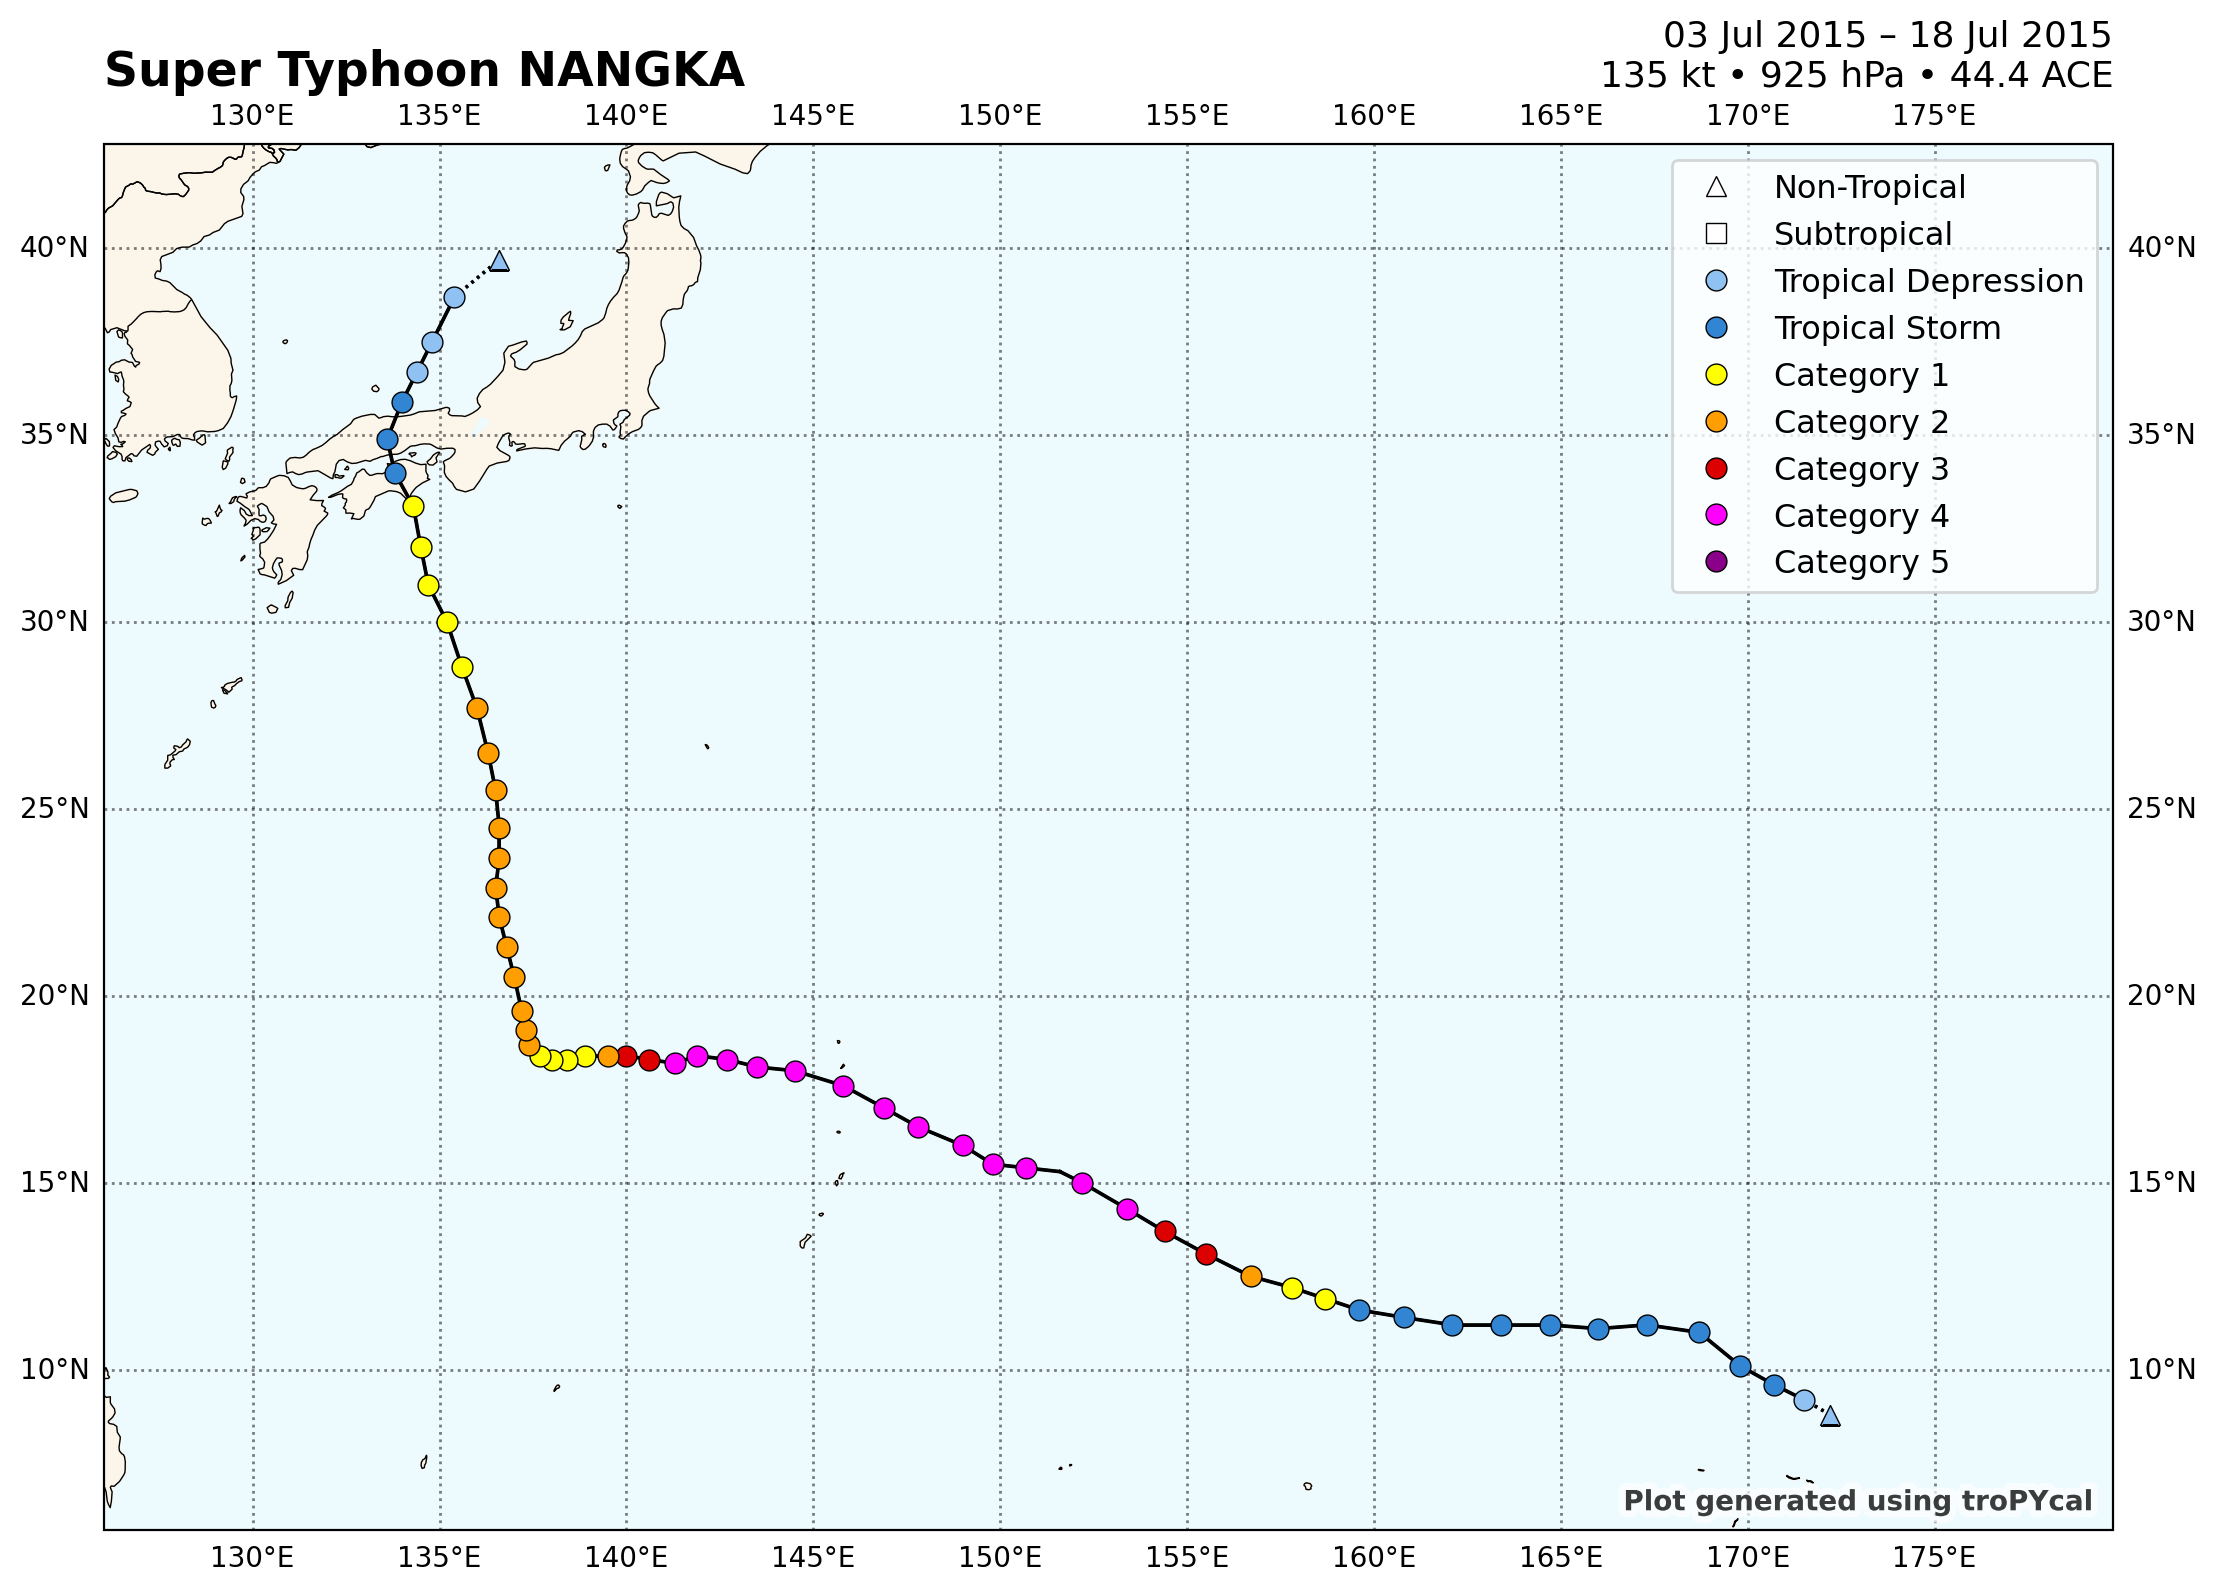

In [4]:
storm.plot()

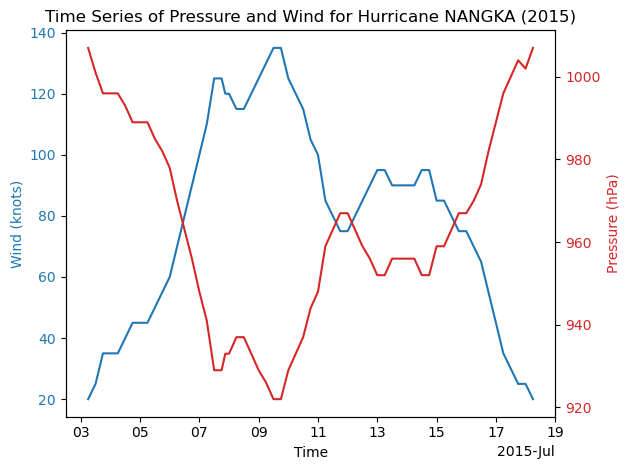

In [16]:
# Extract time, pressure, and wind data
times = storm['time']
pressures = storm['mslp']
winds = storm['vmax']

# Create a figure and axis
fig, ax1 = plt.subplots()

ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))

# Plot wind data
ax1.set_xlabel('Time')
ax1.set_ylabel('Wind (knots)', color='tab:blue')
ax1.plot(times, winds, color='tab:blue', label='Wind')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot pressure data
ax2 = ax1.twinx()
ax2.set_ylabel('Pressure (hPa)', color='tab:red')
ax2.plot(times, pressures, color='tab:red', label='Pressure')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a title and show the plot
plt.title('Time Series of Pressure and Wind for Hurricane '+storm['name']+' ('+str(storm['year'])+')')
fig.tight_layout()
plt.show()

Let's use the 1200 UTC 30 September initialization for our example. First, let's plot a map showing the GEFS ensemble forecasts and the track density plot:

In [10]:
import datetime as dt
# forecast_init = dt.datetime(2016,7,3,0)
# forecast_init = dt.datetime(2016,7,3,12)
# forecast_init = dt.datetime(2018,9,1,12)
# forecast_init = dt.datetime(2019,9,3,12)
forecast_init = dt.datetime(2015,7,4,6)
# forecast_init = dt.datetime(2017,9,16,12)

storm.plot_ensembles(forecast=forecast_init)

RuntimeError: Error: Could not determine the latest available GEFS forecast.

We can also pick a specific forecast hour to zero in on, which instead of showing a cumulative track density map will now show the track density valid at that specific forecast hour, alongside an ellipse representing ensemble position spread:

<GeoAxes: title={'left': 'GEFS Forecast Tracks for Maria\nTrack Density (200-km radius)', 'right': 'Hour 108 | Valid 0000 UTC 21 September 2017\nInitialized 1200 UTC 16 September 2017'}>

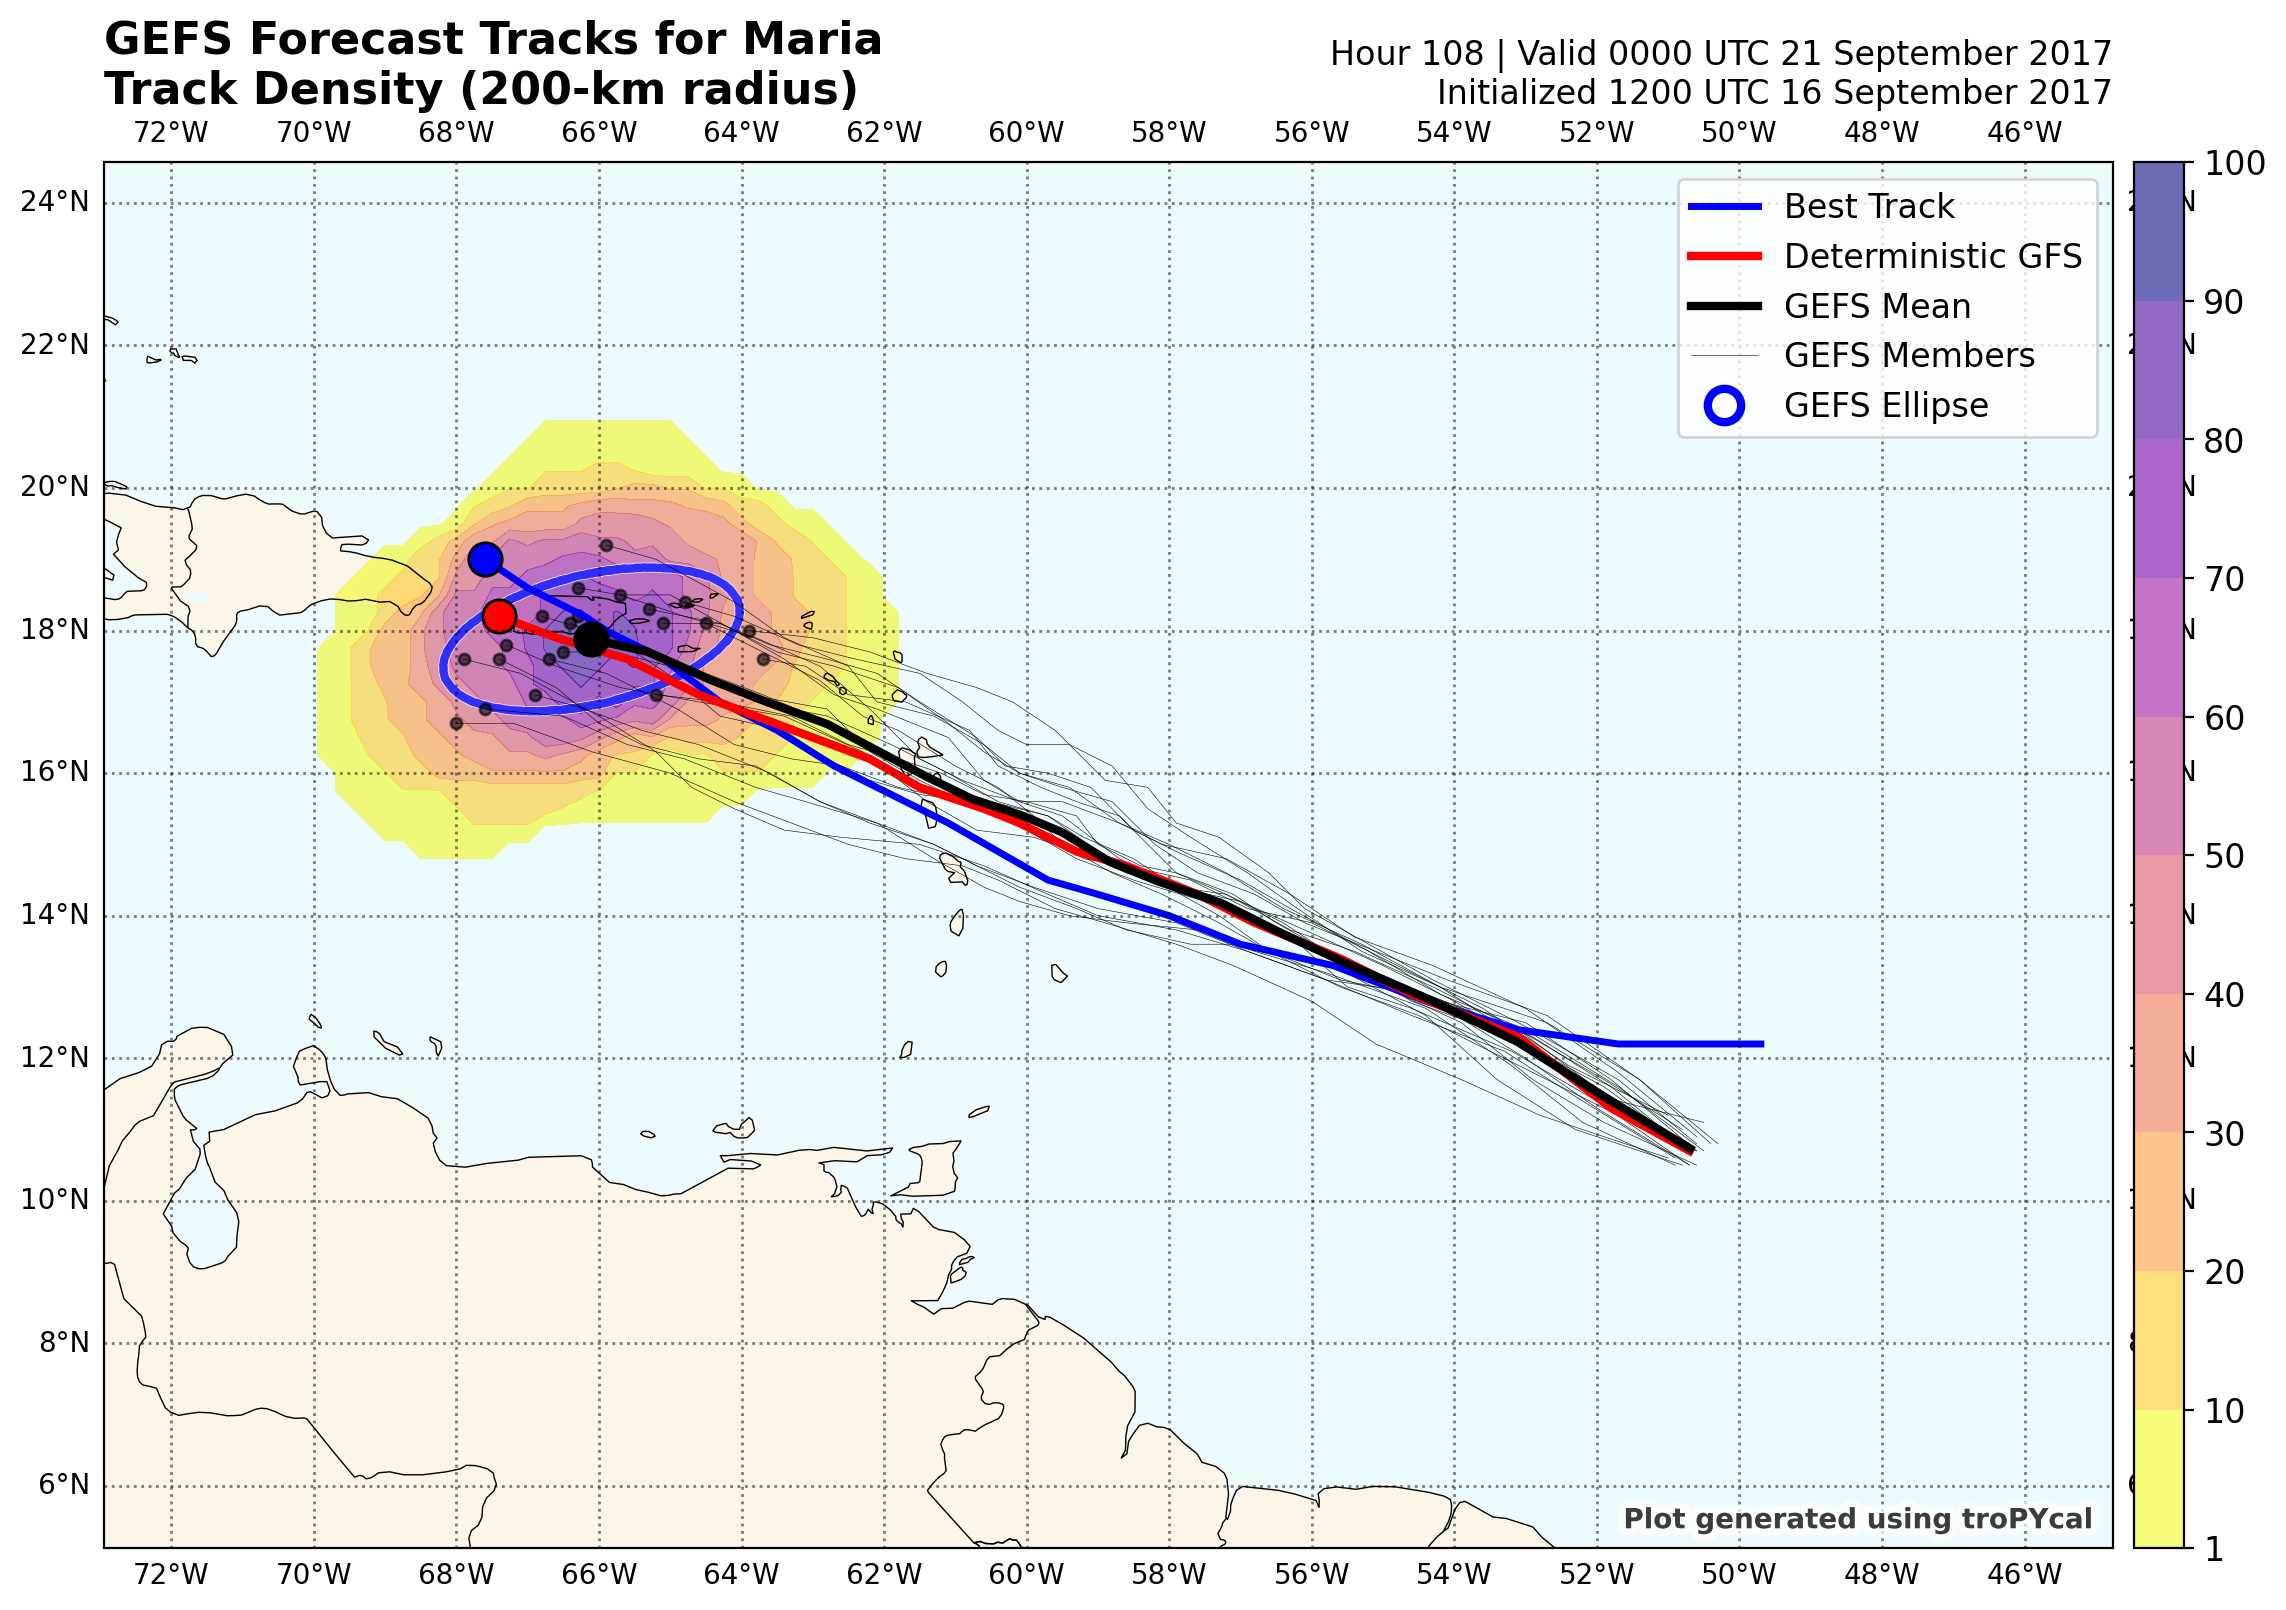

In [20]:
storm.plot_ensembles(forecast=forecast_init, fhr=108)

Check out the documentation for more plot customization options, such as editing the density radius (the default is 200 km), which lines to plot and their width and colors.

Alternatively, we can also look at all forecast models initialized at the same time, compared against Best Track verification:

<GeoAxes: title={'left': 'Model Forecast Tracks for Maria', 'right': 'Initialized 1200 UTC 16 September 2017'}>

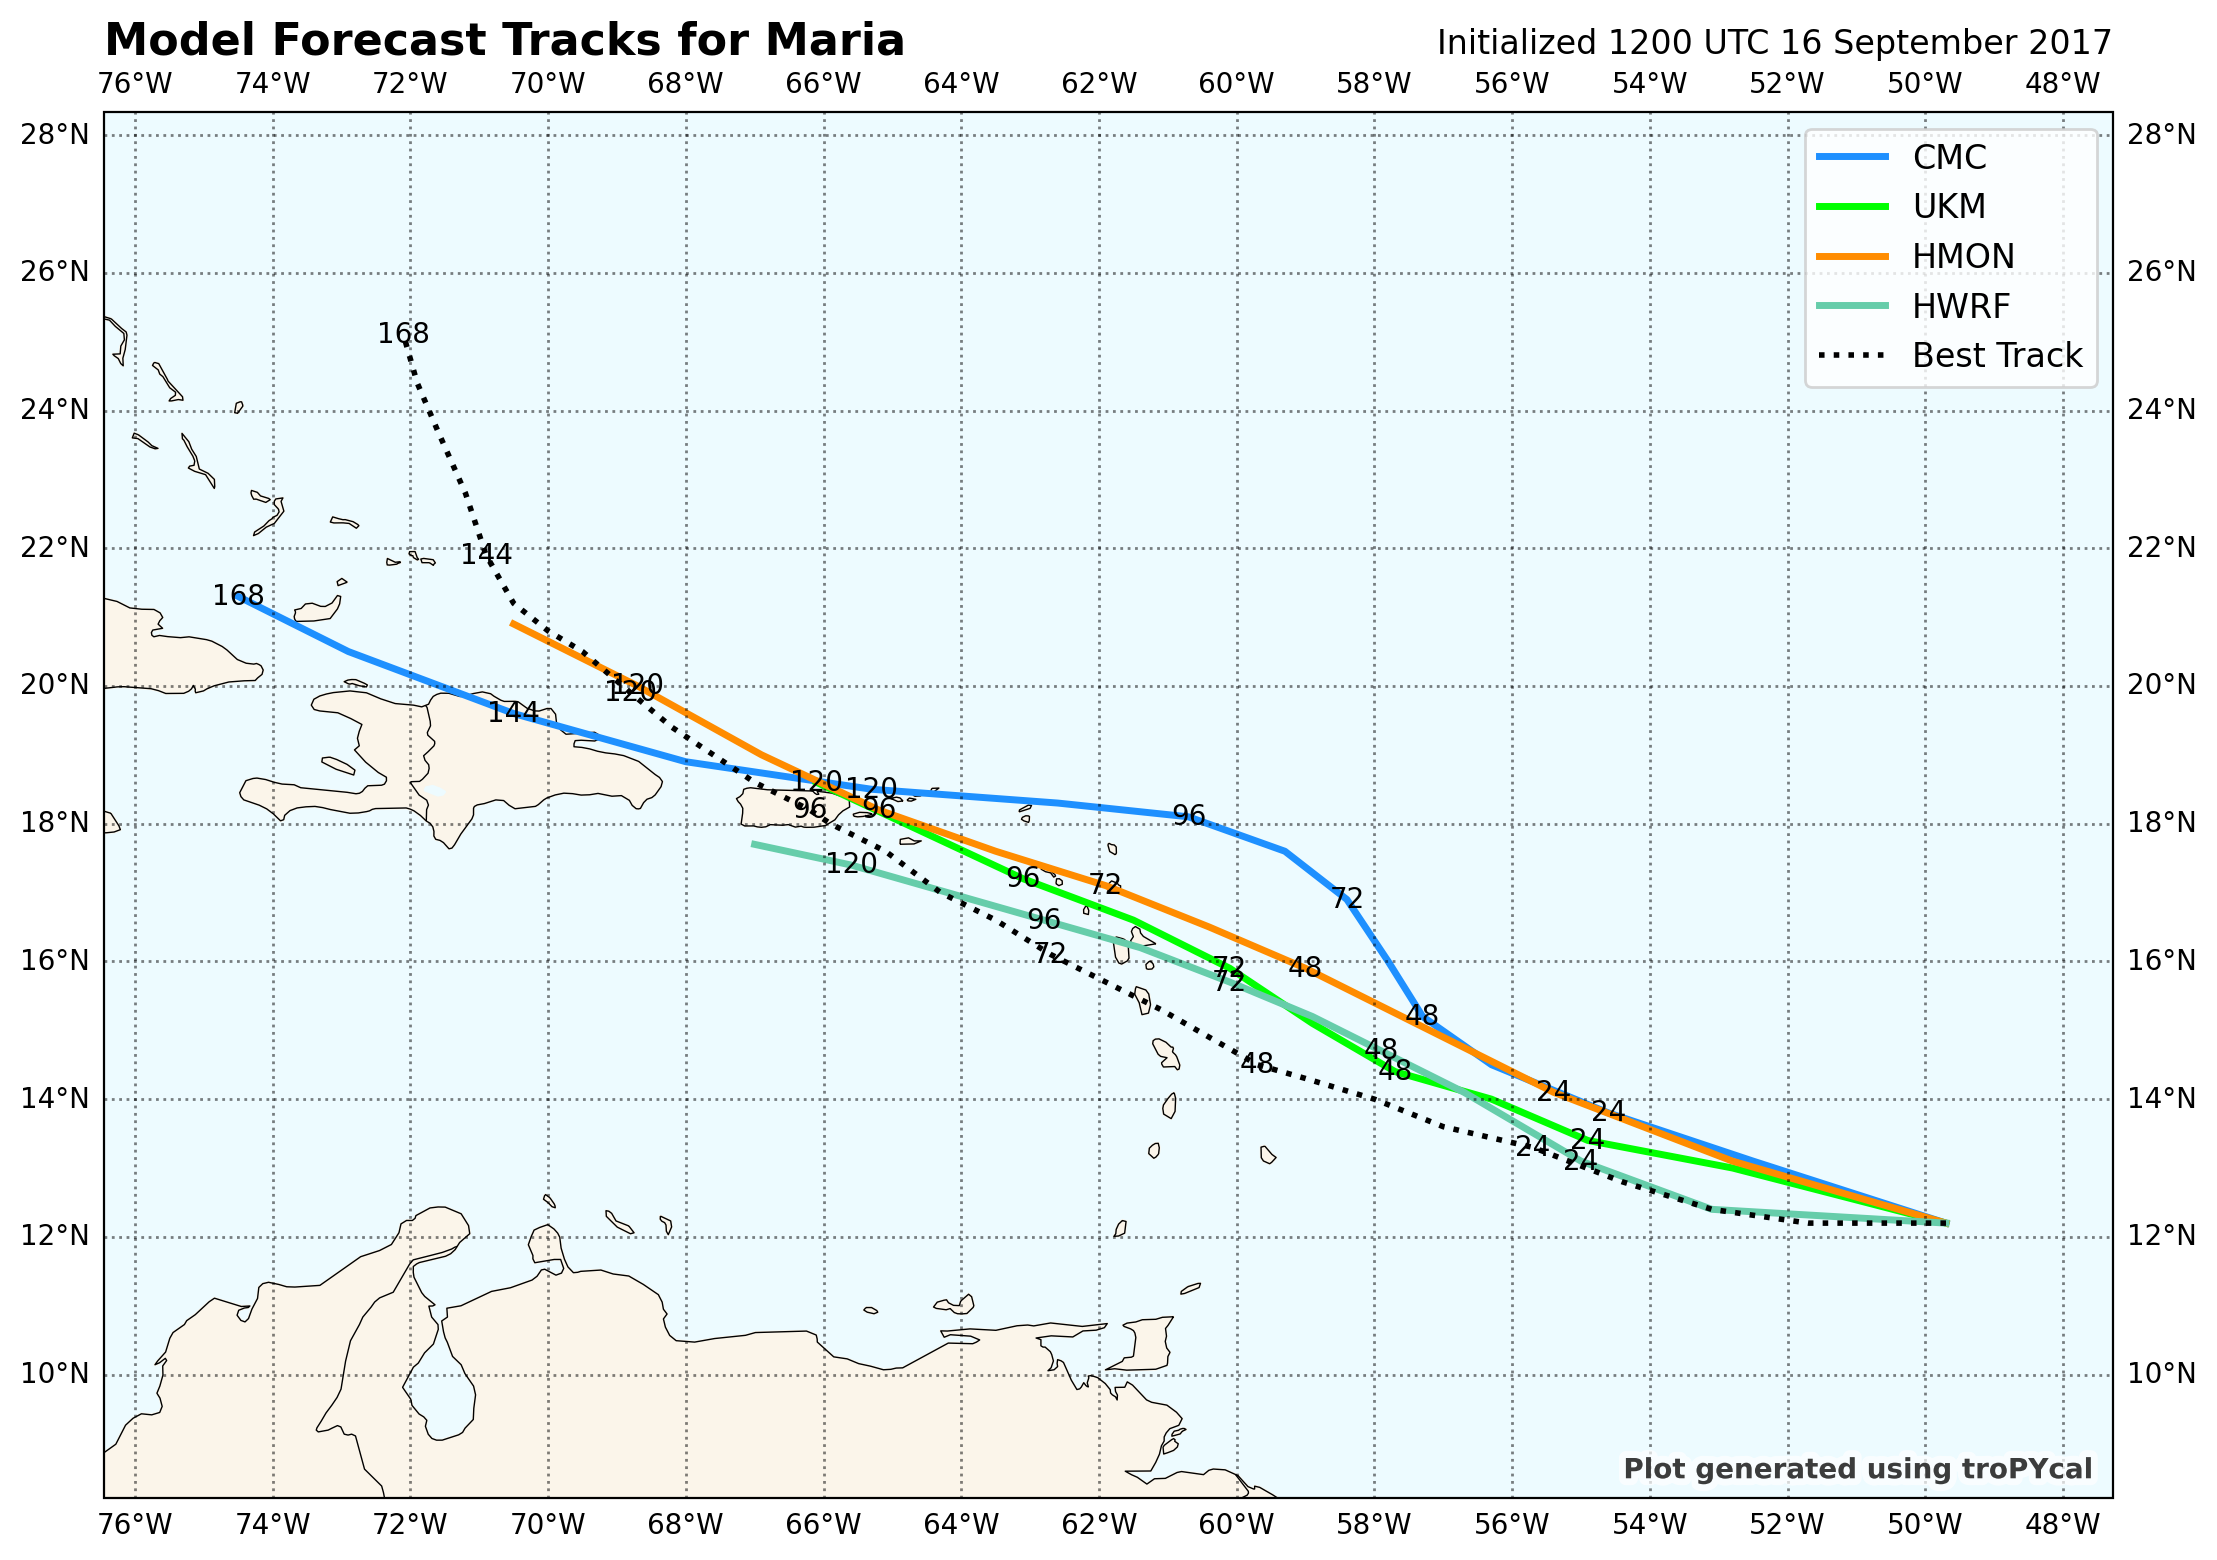

In [21]:
storm.plot_models(forecast=forecast_init, plot_btk=True)